In [1]:
#| default_exp feature.codeengine

In [2]:
#| exporti

from dataclasses import dataclass, field

from typing import List
import datetime as dt

import mbison.client.core as dmda

In [3]:
#| hide
import nbdev
import os
from pprint import pprint

In [4]:
auth = dmda.DomoAuth(
    domo_instance=os.environ["DOMO_INSTANCE"],
    access_token=os.environ["DOMO_ACCESS_TOKEN"],
)
auth

DomoAuth(domo_instance='domo-community', username=None)

## Routes

In [5]:
#| exports

def get_packages(auth: dmda.DomoAuth, debug_api : bool = False):
    endpoint = "/api/codeengine/v2/packages"

    res = dmda.domo_api_request(endpoint = endpoint,
                                auth=auth, request_type="get",
                                debug_api= debug_api
                                )

    return res

[{'id': 'fd94540a-8c94-4d8c-af0f-8b149138add0',
  'name': 'DOMO DataFlows',
  'description': 'Run and retrieve information for a Domo DataFlow',
  'language': 'JAVASCRIPT',
  'environment': 'LAMBDA',
  'availability': 'GLOBAL',
  'thumbnail': '',
  'owner': '27',
  'versions': [{'version': '2.0.9',
    'description': '',
    'createdBy': '1658438246',
    'released': '2024-08-05T14:21:03.410Z',
    'functions': [],
    'configuration': {'accountsMapping': [],
     'mlModel': [],
     'externalPackageMapping': {}}}],
  'users': [],
  'createdOn': '2023-03-28T23:51:36.539Z',
  'updatedOn': '2024-08-05T15:19:14.351Z',
  'packageSource': 'DOMO'}]
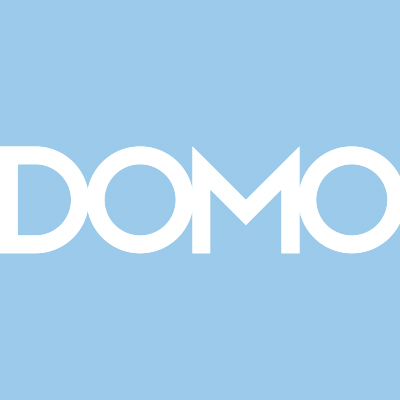

In [6]:
res = get_packages(auth=auth, debug_api= False)
packages = res.response

packages[0:1]

In [7]:
#| exports

def get_package_by_id(auth: dmda.DomoAuth, package_id, debug_api : bool = False):
        
        endpoint = f"/api/codeengine/v2/packages/{package_id}"
                
        return dmda.domo_api_request(endpoint=endpoint, request_type = 'get', auth=auth, debug_api=debug_api)


ResponseGetData(response={'id': 'fd94540a-8c94-4d8c-af0f-8b149138add0', 'name': 'DOMO DataFlows', 'description': 'Run and retrieve information for a Domo DataFlow', 'language': 'JAVASCRIPT', 'environment': 'LAMBDA', 'availability': 'GLOBAL', 'thumbnail': '', 'owner': '27', 'versions': [{'version': '2.0.9', 'description': '', 'createdBy': '1658438246', 'released': '2024-08-05T14:21:03.410Z', 'functions': [], 'configuration': {'accountsMapping': [], 'mlModel': [], 'externalPackageMapping': {}}}], 'users': [], 'createdOn': '2023-03-28T23:51:36.539Z', 'updatedOn': '2024-08-05T15:19:14.351Z', 'packageSource': 'DOMO'}, is_success=True, status=200, download_path=None)
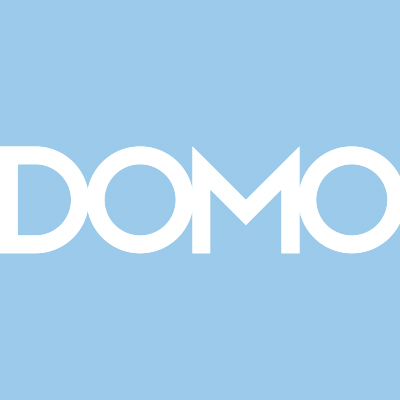

In [8]:
get_package_by_id(auth = auth, package_id = packages[0]['id'])

In [9]:
#| exports

def get_package_versions(auth: dmda.DomoAuth, package_id, debug_api : bool = False):
        """each package can have one or many version"""
        
        endpoint = f"/api/codeengine/v2/packages/{package_id}/versions/"

        params = {"parts" : " functions,code"}
                
        return dmda.domo_api_request(endpoint=endpoint, request_type = 'get', auth=auth,params=params, debug_api=debug_api)


def get_package_version_by_id(auth: dmda.DomoAuth, package_id, version, debug_api : bool = False):
        
        endpoint = f"/api/codeengine/v2/packages/{package_id}/versions/{version}"

        params = {"parts" : " functions,code"}
                
        return dmda.domo_api_request(endpoint=endpoint, request_type = 'get', auth=auth,params=params, debug_api=debug_api)


In [10]:
package = packages[1]

get_package_version_by_id(
    auth=auth, package_id=package["id"], version=package["versions"][0]["version"]
)

ResponseGetData(response={'packageId': '0b628c44-0a1a-4e76-83ae-681cde27b129', 'version': '3.0.0', 'description': '', 'code': "const codeengine = require('codeengine');\n\nclass Helpers {\n  /**\n   * Helper function to handle API requests and errors\n   * @param {text} method - The HTTP method\n   * @param {text} url - The endpoint URL\n   * @param {Object} [body=null] - The request body\n   * @returns {Object} The response data\n   * @throws {Error} If the request fails\n   */\n  static async handleRequest(method, url, body = null) {\n    try {\n      return await codeengine.sendRequest(method, url, body);\n    } catch (error) {\n      console.error(`Error with ${method} request to ${url}:`, error);\n      throw error;\n    }\n  }\n}\n\n/**\n * Get the official Domo user object, with details like role / avatar / etc\n *\n * @param {Person} person - The person\n * @returns {object} - The user object\n */\nasync function fetchUser(person) {\n  try {\n    return await Helpers.handleRequ

In [11]:
package = packages[1]

get_package_versions(
    auth=auth, package_id=package["id"])

ResponseGetData(response=[{'packageId': '0b628c44-0a1a-4e76-83ae-681cde27b129', 'version': '1.0.0', 'description': 'Retrieve information about a Domo User.', 'createdBy': '-1', 'updatedOn': '2023-05-23T20:06:40.252Z', 'releasedOn': '2023-03-30T20:43:37.211Z', 'functions': [{'name': 'getUserDisplayName', 'displayName': 'getUserDisplayName', 'description': "Retrieve the specified user's display name.", 'inputs': [{'name': 'userId', 'displayName': 'userId', 'type': 'number', 'value': 0, 'nullable': False, 'isList': False, 'children': None, 'entitySubType': None}], 'output': {'name': 'result', 'displayName': 'result', 'type': 'text', 'value': None, 'nullable': False, 'isList': False, 'children': None, 'entitySubType': None}}, {'name': 'getUserEmailAddress', 'displayName': 'getUserEmailAddress', 'description': 'Get email address for the specified user.', 'inputs': [{'name': 'userId', 'displayName': 'userId', 'type': 'number', 'value': 0, 'nullable': False, 'isList': False, 'children': None,

## Classes

In [12]:
#| exports

@dataclass 
class DomoCodeEngine_PackageVersion:
    """one package can have multiple versions"""
    
    auth : dmda.DomoAuth = field(repr = False)
    package_id: str
    version : str
    code : str
    created_by : dict
    created_on_dt : dt.datetime
    updated_by : dict
    updated_on_dt : dt.datetime

    @classmethod
    def from_json(cls, auth: dmda.DomoAuth, obj):
        return cls(
            auth = auth,
            package_id = obj['packageId'],
            version = obj['version'],
            code = obj["code"],
            created_by = obj["createdBy"],
            created_on_dt = obj["createdOn"],
            updated_by = obj["updatedBy"],
            updated_on_dt = obj["updatedOn"],
        )
    
    @classmethod
    def get_by_id(cls, auth : dmda.DomoAuth, package_id : str , version: str, return_raw : bool = False, debug_api: bool=  False):

        res = get_package_version_by_id(auth = auth, package_id = package_id, 
                                  version = version, debug_api = debug_api)

        if return_raw:
            return res

        return cls.from_json(
            auth = auth,
            obj = res.response
        )



In [13]:
DomoCodeEngine_PackageVersion.get_by_id(
    auth=auth, 
    package_id=package["id"],
    version=package["versions"][0]["version"]
)

DomoCodeEngine_PackageVersion(package_id='0b628c44-0a1a-4e76-83ae-681cde27b129', version='3.0.0', code="const codeengine = require('codeengine');\n\nclass Helpers {\n  /**\n   * Helper function to handle API requests and errors\n   * @param {text} method - The HTTP method\n   * @param {text} url - The endpoint URL\n   * @param {Object} [body=null] - The request body\n   * @returns {Object} The response data\n   * @throws {Error} If the request fails\n   */\n  static async handleRequest(method, url, body = null) {\n    try {\n      return await codeengine.sendRequest(method, url, body);\n    } catch (error) {\n      console.error(`Error with ${method} request to ${url}:`, error);\n      throw error;\n    }\n  }\n}\n\n/**\n * Get the official Domo user object, with details like role / avatar / etc\n *\n * @param {Person} person - The person\n * @returns {object} - The user object\n */\nasync function fetchUser(person) {\n  try {\n    return await Helpers.handleRequest(\n      'get',\n   

In [14]:
# | exports


@dataclass
class DomoCodeEngine_Package:
    auth: dmda.DomoAuth = field(repr=False)
    id: str
    name: str
    environment: str
    availability: str
    owner: dict

    created_on_dt: dt.datetime
    updated_on_dt: dt.datetime

    source: str

    current_version: str = None
    description: str = None
    language: str = None

    dce_versions: List[DomoCodeEngine_PackageVersion] = None
    dce_current_version: DomoCodeEngine_PackageVersion = None

    @classmethod
    def from_json(cls, auth: dmda.DomoAuth, obj):

        return cls(
            auth=auth,
            id=obj["id"],
            name=obj["name"],
            language=obj["language"],
            environment=obj["environment"],
            availability=obj["availability"],
            owner=obj["owner"],
            created_on_dt=obj["createdOn"],
            updated_on_dt=obj["updatedOn"],
            source=obj["packageSource"],
            description=obj.get("description"),
            current_version=obj.get("versions")[0]["version"],
        )

    @classmethod
    def get_by_id(
        cls,
        auth: dmda.DomoAuth,
        package_id,
        debug_api: bool = False,
        return_raw: bool = False,
    ):
        res = get_package_by_id(auth=auth, package_id=package_id, debug_api=debug_api)

        if return_raw:
            return res

        return cls.from_json(auth=auth, obj=res.response)

    def get_versions(self, debug_api: bool = False, return_raw: bool = False):

        res = get_package_versions(
            auth=self.auth, package_id=self.id, debug_api=debug_api
        )

        if return_raw:
            return res

        self.dce_versions = [
            DomoCodeEngine_PackageVersion.from_json(auth=self.auth, obj=obj)
            for obj in res.response
        ]

        return self.dce_versions

    def get_current_version(self, debug_api: bool = False, return_raw: bool = False):

        res = DomoCodeEngine_PackageVersion.get_by_id(
            auth=self.auth,
            package_id=self.id,
            version=self.current_version,
            debug_api=debug_api,
            return_raw=return_raw,
        )

        if return_raw:
            return res

        self.dce_current_version = res

        return self.dce_current_version

In [15]:
pprint(DomoCodeEngine_Package.get_by_id(auth = auth, package_id=package['id']))

DomoCodeEngine_Package(id='0b628c44-0a1a-4e76-83ae-681cde27b129',
                       name='DOMO Users',
                       environment='LAMBDA',
                       availability='GLOBAL',
                       owner='27',
                       created_on_dt='2023-03-30T20:43:36.968Z',
                       updated_on_dt='2024-07-29T19:32:24.252Z',
                       source='DOMO',
                       current_version='3.0.0',
                       description='Retrieve or update information for a Domo '
                                   'user.',
                       language='JAVASCRIPT',
                       dce_versions=None,
                       dce_current_version=None)


In [16]:
#| export 

@dataclass
class DomoCodeEngine_Packages:
    auth: dmda.DomoAuth = field(repr = False)
    packages : List[dict] = field(repr = False, default = None)

    dce_packages:  List[DomoCodeEngine_Package] = field(default_factory=lambda : [])

    def get_packages(self, debug_api: bool = False, return_raw : bool = False):
        res = get_packages(auth = self.auth, debug_api = debug_api)

        if return_raw:
            return res

        self.packages = res.response
        
        self.dce_packages = [DomoCodeEngine_Package.from_json(auth=self.auth , obj = obj) for obj in self.packages]

        return self.dce_packages

In [17]:
dce_packages = DomoCodeEngine_Packages(auth = auth )

dce_packages.get_packages()[0:5]

[DomoCodeEngine_Package(id='fd94540a-8c94-4d8c-af0f-8b149138add0', name='DOMO DataFlows', environment='LAMBDA', availability='GLOBAL', owner='27', created_on_dt='2023-03-28T23:51:36.539Z', updated_on_dt='2024-08-05T15:19:14.351Z', source='DOMO', current_version='2.0.9', description='Run and retrieve information for a Domo DataFlow', language='JAVASCRIPT', dce_versions=None, dce_current_version=None),
 DomoCodeEngine_Package(id='0b628c44-0a1a-4e76-83ae-681cde27b129', name='DOMO Users', environment='LAMBDA', availability='GLOBAL', owner='27', created_on_dt='2023-03-30T20:43:36.968Z', updated_on_dt='2024-07-29T19:32:24.252Z', source='DOMO', current_version='3.0.0', description='Retrieve or update information for a Domo user.', language='JAVASCRIPT', dce_versions=None, dce_current_version=None),
 DomoCodeEngine_Package(id='117b49fb-b492-46e4-9fd7-459a096f48c7', name='Twilio', environment='LAMBDA', availability='GLOBAL', owner='1658438246', created_on_dt='2024-05-20T19:03:27.410Z', updated_

In [18]:
#| hide
nbdev.nbdev_export('./codeengine.ipynb')